# **ขั้นตอนการทำงาน**
1.ติดตั้ง Library ที่จำเป็นต้องใช้ \\
2.Upload รูปภาพที่ต้องการทำ Image alignment \\
3.เปลี่ยนสีของรูปภาพเป็นขาวดำ \\
4.หาขอบด้วย Canny edge detector \\
5.หา contours และเรียง contours ที่ได้จากมากไปน้อย และเลือกใช้อันที่มีค่ามากที่สุด \\
6.นำ contours ที่ได้มาทำการประมาณ เพื่อให้ได้คู่อันดับ (x,y) \\
7.หากคู่อันดับ (x,y) ที่ได้มี 4 คู่อันดับ จะนำคู่อันดับไปจัดตำแหน่งใหม่ด้วยฟังก์ชัน mapp \\
8.นำรูปภาพที่เราต้องการทำ Image alignment และ ค่าที่ได้จากการนำคู่อันดับที่ผ่านฟังก์ชัน mapp มาแล้ว มาเข้าฟังก์ชัน four_point_transform เพื่อคำนวณว่ามุมทั้ง 4 มุมควรอยู่ตรงไหน และ apply รูปที่เราต้องการนั้นเข้าไป \\
9.นำรูปภาพที่ได้มาผ่าน filter2D ด้วย kernel ที่กำหนดเพื่อเพิ่มความชัดให้กับรูปภาพ \\
10.ได้ผลลัพธ์

# **ฟังก์ชันเสริม**
1.OCR \\
2.Translate using googletrans \\
3.Binarize image \\
4.Rotate image \\

# **Install library**

In [ ]:
!pip install googletrans==3.1.0a0 #ใช้แปลภาษา

     |████████████████████████████████| 55 kB 1.7 MB/s 
     |████████████████████████████████| 1.3 MB 7.3 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 65 kB 2.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=17635effbe1d4be53d04ba0e0f6952069b944b7fd301f37629e101501fad6acd
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=736388aec09cc1c8e40043a5802ae1a94e056e76963d77ee6cbcdb25ce8ac29d
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [ ]:
!sudo apt install tesseract-ocr #ใช้ทำ OCR

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,786 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
!sudo apt-get install tesseract-ocr-tha #ใช้ทำ OCR ที่เป็นภาษาไทย

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-tha
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 898 kB of archives.
After this operation, 1,087 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-tha all 4.00~git24-0e00fe6-1.2 [898 kB]
Fetched 898 kB in 2s (421 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-tha.
(Reading database

# **Input image**

Saving 257906951_1065976184151260_1438648010032083148_n.jpg to 257906951_1065976184151260_1438648010032083148_n (2).jpg


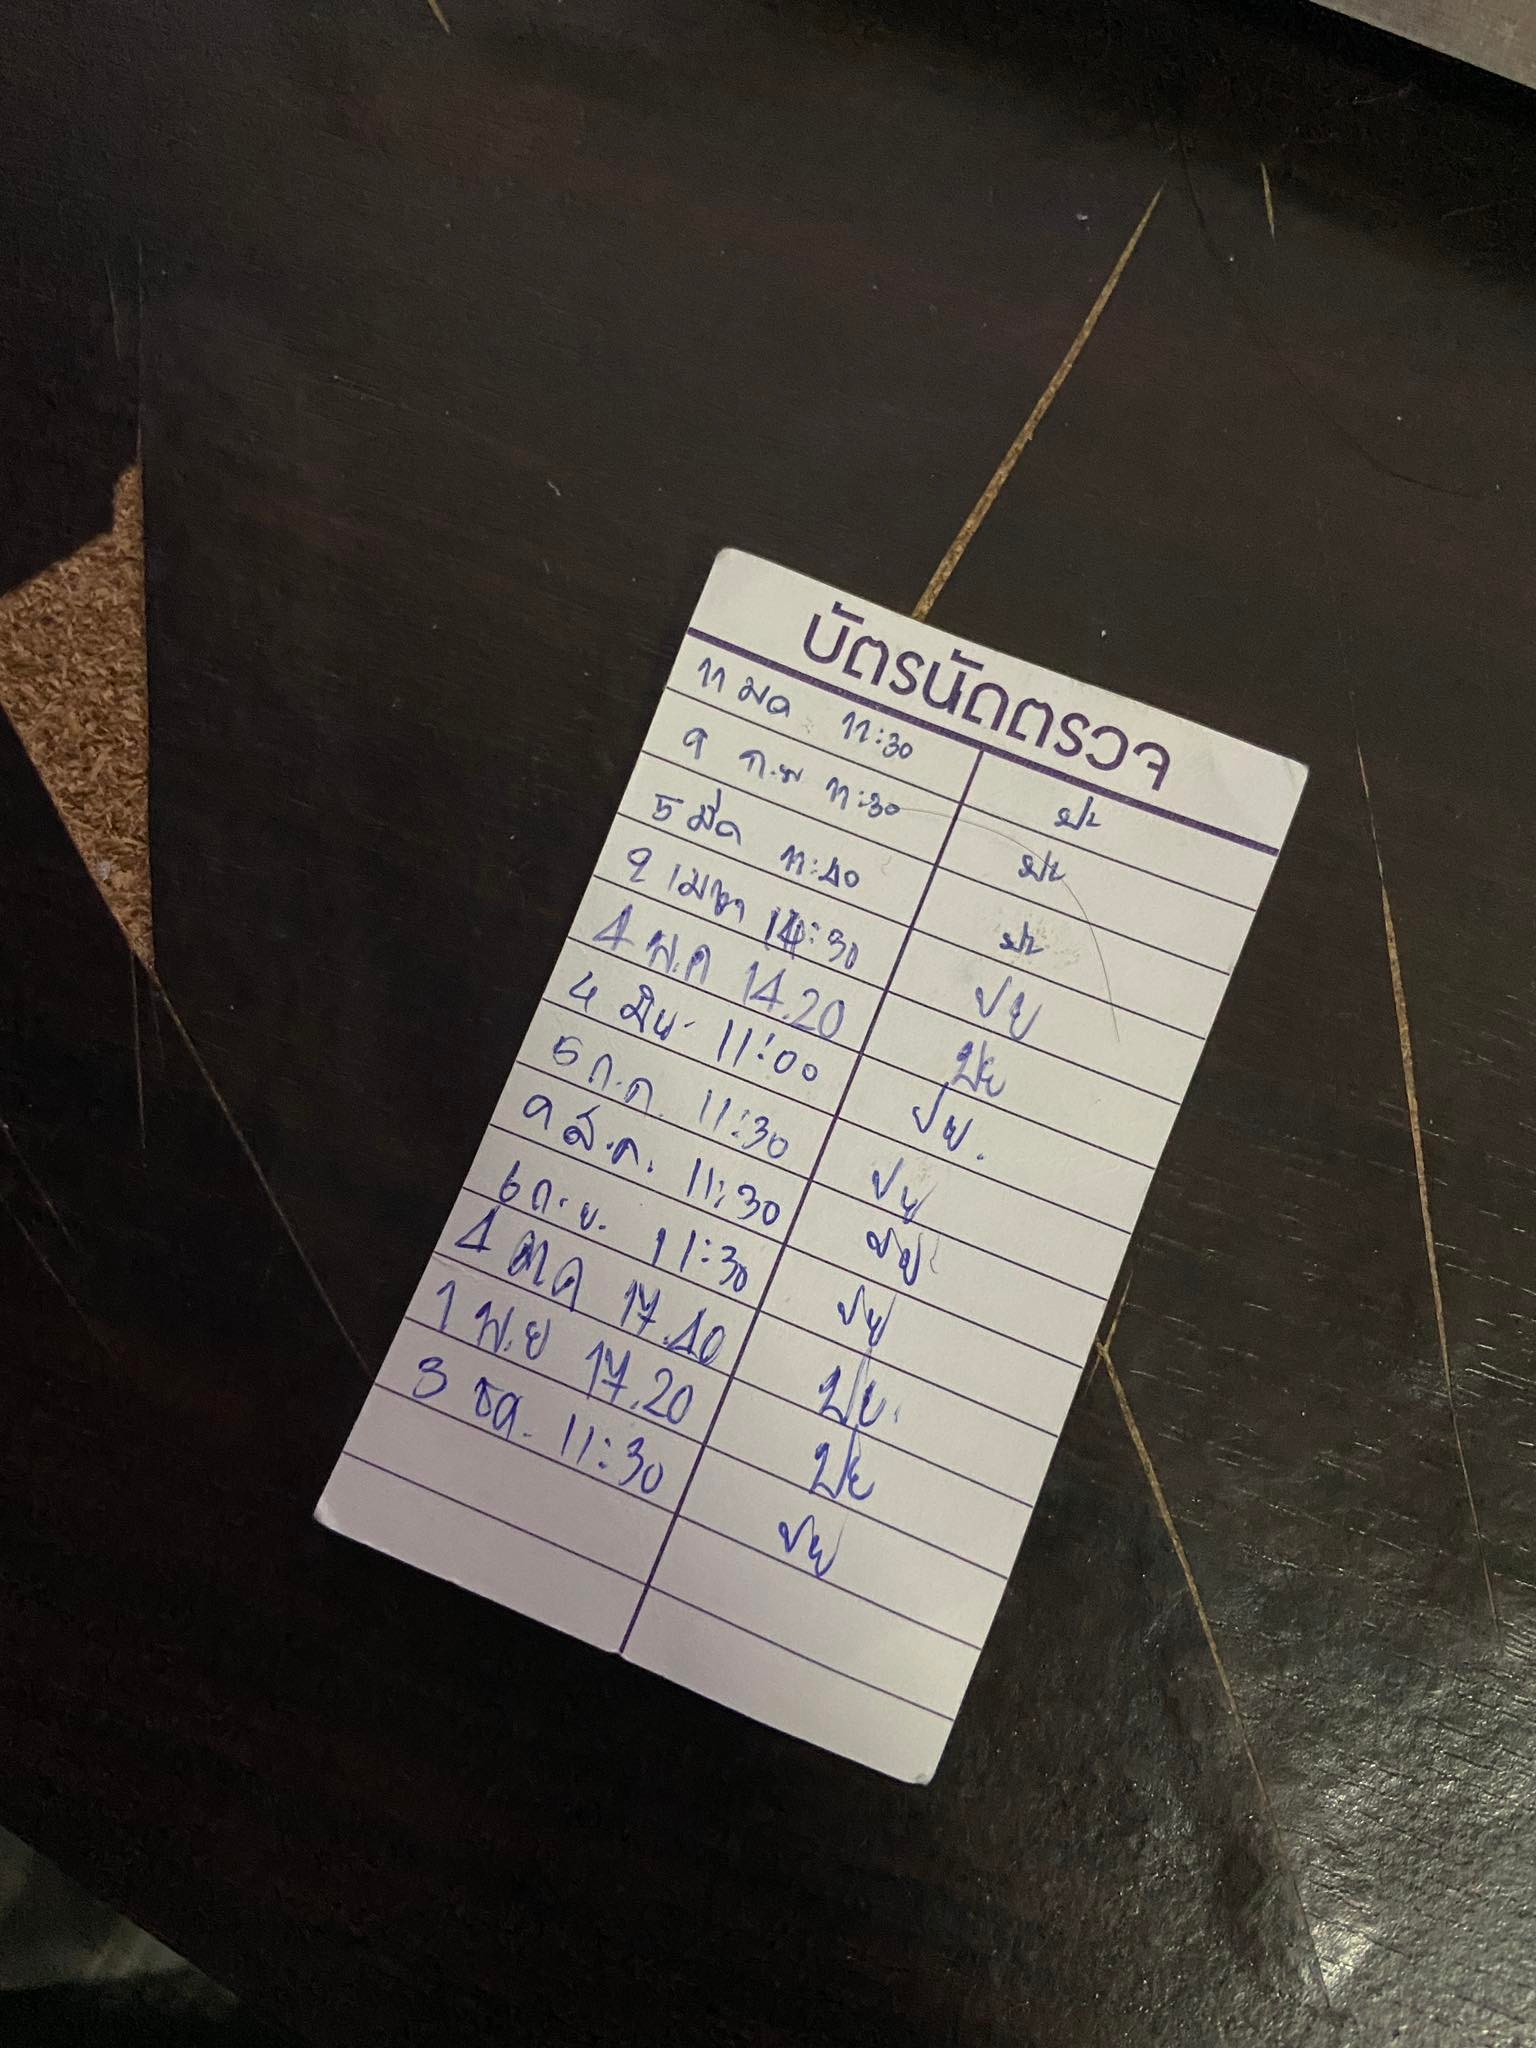

In [ ]:
#@markdown <h3> 🖼️ เลือกรูปภาพ Choose An Image</h3>
#@markdown <small>สามารถเลือกภาพตัวอย่างหรือจะอัพโหลดภาพของคุณ Pick the preset image or upload your own image</small>
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files
from IPython.display import HTML
import imutils
from skimage.filters import threshold_local
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract
import shutil
import random
from googletrans import Translator
try:
 from PIL import Image
except ImportError:
 import Image

image = '\uD83D\uDCE4 upload your image' #@param ['🗏 page', '🧾 receipt', '📤 upload your image']

image = ' '.join(image.split(' ')[1:])
onedrive_dataset = None

image_url = {
  'page': 'https://tuipied-my.sharepoint.com/:i:/g/personal/sarung_staff_tu_ac_th/EYrbOpH-4KxKh92HODIIu14BtZ-2t7tPW2BAqpK9cpCPwA?download=1',
  'receipt': 'https://tuipied-my.sharepoint.com/:i:/g/personal/sarung_staff_tu_ac_th/Eas6Z4A_v0JBr8r-AEgh8VQBeOoOWC2tdZtEPc_CJ3RPNw?download=1',
}

if image == 'upload your image': onedrive_dataset = ':images_upload:'
elif image in image_url:  onedrive_dataset = image_url[image]
if onedrive_dataset == None: raise Exception('Cannot select image')

preupload_datasets = None
if onedrive_dataset == ':images_upload:':
  display(HTML('<h3>Select your image</h3>'))
  # display(HTML('<p/>You can select multiple images by pressing ctrl, cmd or shift and click.<p>'))
  dir = os.getcwd()
  uploaded = files.upload()
  preupload_datasets = [os.path.join(dir, f) for f in uploaded.keys()]
  image_fn = preupload_datasets[0]
else:
  get_ipython().system_raw('wget -O image.jpg ' + onedrive_dataset)
  image_fn = 'image.jpg'

im = cv2.imread(image_fn)
cv2_imshow(im)

# **Function**
มี 3 ฟังก์ชัน ได้แก่ mapp, four_point_transform, rotate


*   mapp ทำหน้าที่จัดตำแหน่งของ 4 มุมของกระดาษ
*   four_point_transform ทำหน้าที่คำนวณความกว้างและความสูงของรูปใหม่ และตำแหน่งเป้าหมายของรูป และคิด perspective transform matrix จากนั้นจะได้รูปภาพที่เป็นเอกสารที่สแกนแล้ว
*  rotate ทำหน้าที่หมุนรูปภาพ



In [ ]:
def mapp(h):
	h = h.reshape((4,2))
	hnew = np.zeros((4,2), dtype= np.float32)
 
	add = h.sum(1)
	hnew[0] = h[np.argmin(add)]
	hnew[2] = h[np.argmax(add)]

	diff = np.diff(h,axis=1)
	hnew[1] = h[np.argmin(diff)]
	hnew[3] = h[np.argmax(diff)]

	return hnew

def four_point_transform(image, pts):

	rect = mapp(pts)
	(tl, tr, br, bl) = rect


	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))

	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))


	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")

	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

	return warped



def rotate(degree):
	rotated = imutils.rotate_bound(result_im_rgb, degree)
	return plt.imshow(rotated),plt.axis('off')
 

# **Preparation**

In [ ]:
#clone original image
original_im = im.copy()
original_im = imutils.resize(original_im, height=500)

#resize
im = imutils.resize(im, height=500)

#change color to gray
im_y = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

#Blur
#im_blur = cv2.GaussianBlur(im_y, (3,3), 0)

#find edge
edge = cv2.Canny(im_y, 50, 200, apertureSize=3)

#find contours
contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
#corner
for cnt in contours:

  approx = cv2.approxPolyDP(cnt,0.02*cv2.arcLength(cnt,True),True)
  if len(approx) == 4:
    target=approx
    break

approx = mapp(target)

fpt = four_point_transform(im,approx)

#Pre show 
kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
result = cv2.filter2D(fpt, ddepth=-1, kernel=kernel)

# Binarize the cropped image
gray_im = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
T = threshold_local(gray_im, 27, offset=20, method="gaussian")
binarized_im = (gray_im > T).astype("uint8") * 255

#convert BGR2RGB
original_im_rgb = cv2.cvtColor(original_im, cv2.COLOR_BGR2RGB)
result_im_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
binarized_im_rgb = cv2.cvtColor(binarized_im, cv2.COLOR_BGR2RGB)

# **Show edge**

In [ ]:
cv2_imshow(edge)

In [ ]:
cv2_imshow(cv2.drawContours(original_im, contours, -1, (0, 255, 0), 3))

# **Show image**

In [ ]:
# Show images
fig = plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(original_im_rgb)
plt.title('original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(result_im_rgb)
plt.title('result')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(binarized_im_rgb)
plt.title('Binarize')
plt.axis('off')
fig.set_facecolor('gray')
plt.show()


# **OCR**


In [ ]:
custom_config = "-l eng --psm 6"
ocr_en = pytesseract.image_to_string(result, config = custom_config)
print(ocr_en)

Ga e >)
SCN oa
pera

Ce)



In [ ]:
custom_config = "-l tha --psm 6"
ocr_th = pytesseract.image_to_string(result, config = custom_config)
print(ocr_th)

 . ว) |
20
0 0 8
[เบ0 0



# **Translate**

In [ ]:
translator = Translator()  
trans = translator.translate(ocr_en, dest='th')
print(trans.text)

In [ ]:
translator = Translator()  
trans_en = translator.translate(ocr_th, dest='en')
print(trans_en.text)

# **Rotate image**

Input image angle : 180


(<matplotlib.image.AxesImage at 0x7f0113530f50>, (-0.5, 161.5, 263.5, -0.5))

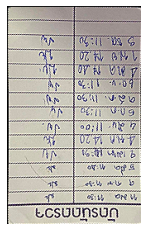

In [ ]:
#input degree
degree = int(input('Input image angle : '))
rotate(degree)

# สมาชิก 
ณัฐดนัย เขื่อนวิชัย 6309658885 \\
ธัชพงศ์ ป้องขันธ์ 6309658927 \\
ดุลยภาพ โตวิวัฒน์ 6309658018 \\
ธิตติภัทร์ ไพรัชศุภวัฒน์ 6309659024

# **References**
* Adrian Rosebrock. (2014. 1 กันยายน). How to Build a Kick-Ass Mobile Document 
Scanner in Just 5 Minutes. (ออนไลน์). เข้าถึงได้จาก : https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/
(วันที่ค้นข้อมูล: 13 พฤศจิกายน 2021) \\
* Aditya Pai Thon (2019. 7 มกราคม). Build your own Document Scanner(CamScanner) from scratch in Python. (ออนไลน์). เข้าถึงได้จาก : https://www.youtube.com/watch?v=PV0uxIfy_-A
(วันที่ค้นข้อมูล: 13 พฤศจิกายน 2021) \\
* Aryaman Sharda. (2017. 21 กันยายน). How Does Optical Character Recognition (OCR) Work?. (ออนไลน์). เข้าถึงได้จาก : https://www.youtube.com/watch?v=cAkklvGE5io
(วันที่ค้นข้อมูล: 13 พฤศจิกายน 2021) \\
* Murtaza’s Workshop — Robotics and AI. (2020. 23 เมษายน). Text Detection with OpenCV in Python | OCR using Tesseract?. (ออนไลน์). เข้าถึงได้จาก : https://www.youtube.com/watch?v=6DjFscX4I_c&t=295s
(วันที่ค้นข้อมูล: 13 พฤศจิกายน 2021) \\
* OpenCV. Contours : Getting Started. (ออนไลน์). เข้าถึงได้จาก : https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html
(วันที่ค้นข้อมูล: 13 พฤศจิกายน 2021) \\
* Ray Smith. (2007, 5 พฤศจิกายน). An Overview of the Tesseract OCR Engine. (ออนไลน์).เข้าถึงได้จาก :
https://ieeexplore.ieee.org/document/4376991/authors#authors
(วันที่ค้นข้อมูล: 13 พฤศจิกายน 2021) \\
* Raqueeb Shaikh. (2020, 22 มิถุนายน). OpenCV (findContours) Detailed Guide. (ออนไลน์).เข้าถึงได้จาก: https://medium.com/analytics-vidhya/opencv-findcontours-detailed-guide-692ee19eeb18
(วันที่ค้นข้อมูล: 13 พฤศจิกายน 2021) \\
* Sofiane Sahir. (2019, 25 มกราคม). Canny Edge Detection Step by Step in Python Computer Vision. (ออนไลน์). เข้าถึงได้จาก : https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
(วันที่ค้นข้อมูล: 13 พฤศจิกายน 2021) \\
* vivek081166 (2019, 2 กุมภาพันธ์). Scan documents using OpenCV python. (ออนไลน์).เข้าถึงได้จาก :
https://developers.goalist.co.jp/entry/2019/02/13/150126
(วันที่ค้นข้อมูล: 13 พฤศจิกายน 2021) \\
